# Preliminary operations

## Import libraries

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 
import seaborn as sns
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

## Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import dataset

In [3]:
# importing dataset
df = pd.read_csv("drive/MyDrive/Progetto Data Mining 1/Dataset/ravdess_features.csv")
df_prep = df.copy()
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   modality             2452 non-null   object 
 1   vocal_channel        2256 non-null   object 
 2   emotion              2452 non-null   object 
 3   emotional_intensity  2452 non-null   object 
 4   statement            2452 non-null   object 
 5   repetition           2452 non-null   object 
 6   actor                1326 non-null   float64
 7   sex                  2452 non-null   object 
 8   channels             2452 non-null   int64  
 9   sample_width         2452 non-null   int64  
 10  frame_rate           2452 non-null   int64  
 11  frame_width          2452 non-null   int64  
 12  length_ms            2452 non-null   int64  
 13  frame_count          2452 non-null   float64
 14  intensity            1636 non-null   float64
 15  zero_crossings_sum   2452 non-null   i

#Data Preparation 1

##Remove useless data

In [4]:
nunique = df_prep.nunique()
cols_to_drop = nunique[nunique == 1].index
df_prep.drop(cols_to_drop, axis=1, inplace=True)
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2256 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   actor                1326 non-null   float64
 6   sex                  2452 non-null   object 
 7   channels             2452 non-null   int64  
 8   frame_width          2452 non-null   int64  
 9   length_ms            2452 non-null   int64  
 10  frame_count          2452 non-null   float64
 11  intensity            1636 non-null   float64
 12  zero_crossings_sum   2452 non-null   int64  
 13  mfcc_mean            2452 non-null   float64
 14  mfcc_std             2452 non-null   float64
 15  mfcc_min             2452 non-null   f

##Fill missing values

Data Segmentation and using the probability distribution within the
segment

In [5]:
# iterating the categorical data columns with missing values ("vocal_channel" and "actor")

for col in ["vocal_channel", "actor"]:
  # grouping the rows by emotions
  # using "apply" function for applying some operations on the groups
  df_prep[col] = df_prep.groupby(["emotional_intensity", "statement", "repetition", "sex"])[col].apply(
      # calling the lambda function for acting on each single group "x"
      # using the "fillna" function for filling the NaN values in the group "x"
      lambda x: x.fillna(
          # filling the NaN values in group "x" using a series where the NaN values has been replaced with random values (".sample" function)
          # these random values has been extracted from a series equal to "x", but where the rows with NaN values has been deleted (".dropna" function)"
          x.dropna().sample(
              # the sample without NaN values has to be the same size of "x" ("n = len(x)")
              n = len(x),
              # the sample must be created with permission to random choose elements also twice
              replace=True
          # the sample must has the same index of "x" for being overwrited on it
              ).set_axis(
                  x.index
                  )
          )
      )
# getting data set info
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2452 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   actor                2452 non-null   float64
 6   sex                  2452 non-null   object 
 7   channels             2452 non-null   int64  
 8   frame_width          2452 non-null   int64  
 9   length_ms            2452 non-null   int64  
 10  frame_count          2452 non-null   float64
 11  intensity            1636 non-null   float64
 12  zero_crossings_sum   2452 non-null   int64  
 13  mfcc_mean            2452 non-null   float64
 14  mfcc_std             2452 non-null   float64
 15  mfcc_min             2452 non-null   f

###Regression

In [6]:
# get data columns
df_data = df_prep.loc[:, "length_ms":"skew"] 

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   length_ms           2452 non-null   int64  
 1   frame_count         2452 non-null   float64
 2   intensity           1636 non-null   float64
 3   zero_crossings_sum  2452 non-null   int64  
 4   mfcc_mean           2452 non-null   float64
 5   mfcc_std            2452 non-null   float64
 6   mfcc_min            2452 non-null   float64
 7   mfcc_max            2452 non-null   float64
 8   sc_mean             2452 non-null   float64
 9   sc_std              2452 non-null   float64
 10  sc_min              2452 non-null   float64
 11  sc_max              2452 non-null   float64
 12  sc_kur              2452 non-null   float64
 13  sc_skew             2452 non-null   float64
 14  stft_mean           2452 non-null   float64
 15  stft_std            2452 non-null   float64
 16  stft_m

In [8]:
X = df_data.dropna().drop("intensity", axis=1).values
y = df_data["intensity"].dropna().values
X_missing_values = df_data[df_data["intensity"].isna()].drop("intensity", axis=1).values

In [9]:
reg = linear_model.Ridge(
    alpha=1.71488196987054,
    random_state = 0
)

reg.fit(X, y)

Ridge(alpha=1.71488196987054, random_state=0)

In [10]:
y_pred = reg.predict(X_missing_values)

In [11]:
len(y_pred)

816

In [12]:
intensity_nan_index = df_prep[df_prep["intensity"].isna()]["intensity"].index
df_prep.loc[intensity_nan_index, "intensity"] = y_pred

In [13]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2452 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   actor                2452 non-null   float64
 6   sex                  2452 non-null   object 
 7   channels             2452 non-null   int64  
 8   frame_width          2452 non-null   int64  
 9   length_ms            2452 non-null   int64  
 10  frame_count          2452 non-null   float64
 11  intensity            2452 non-null   float64
 12  zero_crossings_sum   2452 non-null   int64  
 13  mfcc_mean            2452 non-null   float64
 14  mfcc_std             2452 non-null   float64
 15  mfcc_min             2452 non-null   f

##Remove duplicates

In [14]:
df_prep.drop_duplicates(inplace=True)
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 0 to 2451
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2452 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   actor                2452 non-null   float64
 6   sex                  2452 non-null   object 
 7   channels             2452 non-null   int64  
 8   frame_width          2452 non-null   int64  
 9   length_ms            2452 non-null   int64  
 10  frame_count          2452 non-null   float64
 11  intensity            2452 non-null   float64
 12  zero_crossings_sum   2452 non-null   int64  
 13  mfcc_mean            2452 non-null   float64
 14  mfcc_std             2452 non-null   float64
 15  mfcc_min             2452 non-null   f

##Split dataset by emotion emphasis

In [15]:
# get the median if intensity for each emotion
df_prep["loudness"] = df_prep.groupby("emotion")["intensity"].transform("median")
# categorize records as "louder" or "non louder", basing on the median of intensity for each emotion
df_prep["loudness"] = df_prep.apply(lambda x: "high" if x["intensity"] > x["loudness"] else "low", axis=1)

In [16]:
df_prep["emotion_type"] = df_prep.apply(lambda x: "strong" if x["emotion"] in ("fearful","angry","happy","surprised", "disgust") else "weak", axis=1)

# define two groups of emphasis level
# high emphasis
df_emph_high = df_prep[
    # strong emotions with high loudness
    ((df_prep["loudness"] == "high") & (df_prep["emotion_type"] == "strong")) | 
    # weak emotions with low loudness
    ((df_prep["loudness"] == "low") & (df_prep["emotion_type"] == "weak"))
]

# low emphasis
df_emph_low = df_prep[
    # strong emotions with low loudness
    ((df_prep["loudness"] == "low") & (df_prep["emotion_type"] == "strong")) | 
    # weak emotions with high loudness
    ((df_prep["loudness"] == "high") & (df_prep["emotion_type"] == "weak"))
]

In [17]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 0 to 2451
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2452 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   actor                2452 non-null   float64
 6   sex                  2452 non-null   object 
 7   channels             2452 non-null   int64  
 8   frame_width          2452 non-null   int64  
 9   length_ms            2452 non-null   int64  
 10  frame_count          2452 non-null   float64
 11  intensity            2452 non-null   float64
 12  zero_crossings_sum   2452 non-null   int64  
 13  mfcc_mean            2452 non-null   float64
 14  mfcc_std             2452 non-null   float64
 15  mfcc_min             2452 non-null   f

###Exporting files

In [18]:
df_prep.to_excel("df_prep.xlsx",
             sheet_name='Prepared Data Set') 

In [19]:
df_emph_high.to_excel("df_prep_emph_high.xlsx",
             sheet_name='Prepared Data Set with low emphasis')

/usr/local/lib/python3.8/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [20]:
df_emph_low.to_excel("df_prep_emph_low.xlsx",
             sheet_name='Prepared Data Set with high emphasis') 

# Data Preparation 2


##Delete high correlation variables

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


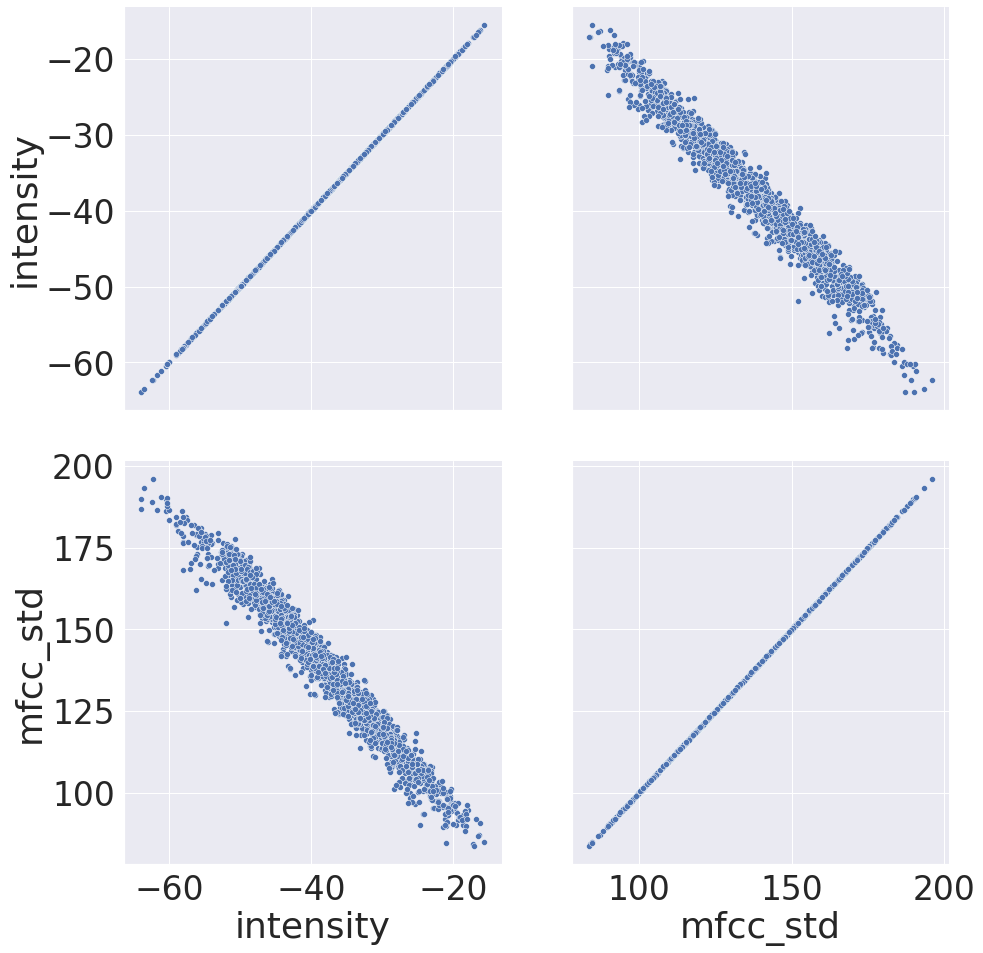

In [21]:
sns.set_theme(font_scale=3)
#sns.pairplot(data=df_prep[["intensity", "mfcc_std"]], size=10)
g = sns.PairGrid(df_prep[["intensity", "mfcc_std"]], size=7)
plt.savefig("correlations.svg", format="svg")
g.map(sns.scatterplot)

In [22]:
cor_matrix = df_prep.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
print(to_drop)
df_prep.drop(df_prep[to_drop].columns, axis=1, inplace=True)

df_prep.info()

['frame_width', 'frame_count', 'mfcc_std', 'mfcc_min', 'sc_skew', 'stft_skew', 'std', 'min', 'max']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 0 to 2451
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2452 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   actor                2452 non-null   float64
 6   sex                  2452 non-null   object 
 7   channels             2452 non-null   int64  
 8   length_ms            2452 non-null   int64  
 9   intensity            2452 non-null   float64
 10  zero_crossings_sum   2452 non-null   int64  
 11  mfcc_mean            2452 non-null   float64
 12  mfcc_max             2452 non-null   float64
 13  sc_mean              2452 non-null   f

<ipython-input-22-b1e71245ce4f>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [23]:
cor_matrix = df_prep.corr().abs()
cor_matrix

,actor,channels,length_ms,intensity,zero_crossings_sum,mfcc_mean,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,stft_mean,stft_std,stft_min,stft_kur,mean,kur,skew
actor,1.000000,0.019501,0.021176,0.017401,0.015945,0.064118,0.015911,0.055272,0.088270,0.042779,0.072308,0.105376,0.026986,0.060912,0.010979,0.036637,0.004365,0.016318,0.055231
channels,0.019501,1.000000,0.011438,0.049863,0.039588,0.058672,0.025047,0.056692,0.062773,0.038106,0.017277,0.041518,0.025579,0.015658,0.007655,0.009364,0.000447,0.024764,0.022957
length_ms,0.021176,0.011438,1.000000,0.282650,0.329517,0.011321,0.347253,0.546234,0.182306,0.077001,0.118781,0.292127,0.561395,0.409380,0.245511,0.072309,0.004213,0.460723,0.064473
intensity,0.017401,0.049863,0.282650,1.000000,0.491768,0.616645,0.387469,0.338929,0.457780,0.116422,0.200803,0.387531,0.339385,0.248552,0.279211,0.089481,0.000757,0.136134,0.392462
zero_crossings_sum,0.015945,0.039588,0.329517,0.491768,1.000000,0.130454,0.448745,0.072949,0.373711,0.190178,0.040921,0.186598,0.406511,0.115175,0.195173,0.072706,0.020279,0.118101,0.201108
mfcc_mean,0.064118,0.058672,0.011321,0.616645,0.130454,1.000000,0.172355,0.282160,0.593395,0.400838,0.375264,0.357717,0.312525,0.354091,0.199302,0.019601,0.005491,0.112305,0.053027
mfcc_max,0.015911,0.025047,0.347253,0.387469,0.448745,0.172355,1.000000,0.151236,0.208612,0.077454,0.000990,0.248825,0.572536,0.497307,0.384902,0.012135,0.009117,0.232757,0.089120
sc_mean,0.055272,0.056692,0.546234,0.338929,0.072949,0.282160,0.151236,1.000000,0.529673,0.128539,0.415215,0.626227,0.562423,0.322951,0.177755,0.007985,0.002090,0.282102,0.026769
sc_std,0.088270,0.062773,0.182306,0.457780,0.373711,0.593395,0.208612,0.529673,1.000000,0.447425,0.593967,0.619887,0.085997,0.199808,0.055442,0.231661,0.015130,0.000941,0.114184
sc_min,0.042779,0.038106,0.077001,0.116422,0.190178,0.400838,0.077454,0.128539,0.447425,1.000000,0.236292,0.018342,0.347950,0.432555,0.355634,0.110168,0.005755,0.065849,0.157102


##Handling outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


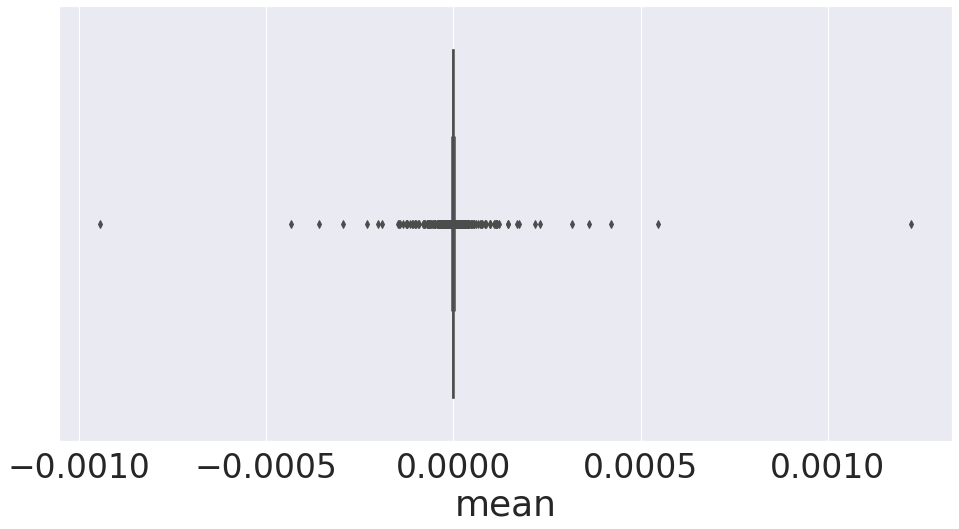

In [24]:
plt.figure(figsize=(16,8))
sns.set(font_scale=3)
#plt.subplot(2,2,1)
#sns.distplot(df_prep['mean'])
sns.boxplot(df_prep['mean'])
plt.savefig("mean_with_outliers.svg", format="svg")
plt.show()

In [25]:
df_data = df_prep.loc[:, "length_ms":"skew"]

percentile25 = df_data.apply(lambda x: x.quantile(0.25))
percentile75 = df_data.apply(lambda x: x.quantile(0.75))
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

df_data_outliers = df_data[(df_data < upper_limit) & (df_data > lower_limit)]
df_prep.loc[:, "length_ms":"skew"] = df_data_outliers

df_prep.info()

for col in df_data.columns:
    df_prep[col] = df_prep[col].fillna(
        value=df_prep.groupby(["vocal_channel", "emotional_intensity", "statement", "repetition", "sex"])[col].transform(
            "median"
            )
        )

df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 0 to 2451
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2452 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   actor                2452 non-null   float64
 6   sex                  2452 non-null   object 
 7   channels             2452 non-null   int64  
 8   length_ms            2441 non-null   float64
 9   intensity            2445 non-null   float64
 10  zero_crossings_sum   2400 non-null   float64
 11  mfcc_mean            2440 non-null   float64
 12  mfcc_max             2451 non-null   float64
 13  sc_mean              2447 non-null   float64
 14  sc_std               2422 non-null   float64
 15  sc_min               2452 non-null   f

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


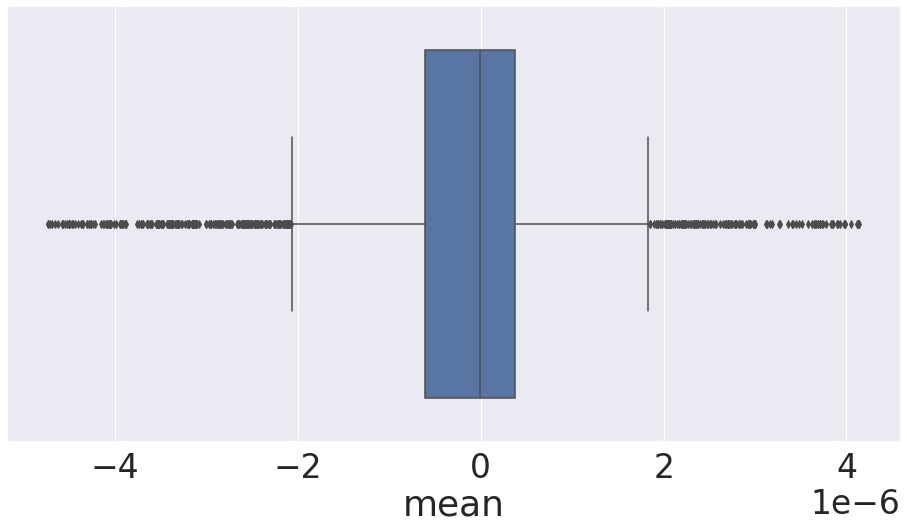

In [26]:
plt.figure(figsize=(16,8))
sns.set(font_scale=3)
sns.boxplot(df_prep['mean'])
plt.savefig("mean_without_outliers.svg", format="svg")
plt.show()

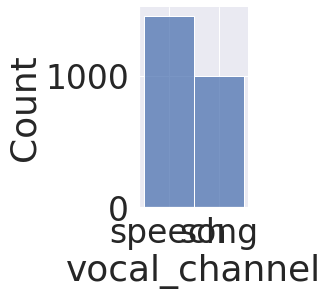

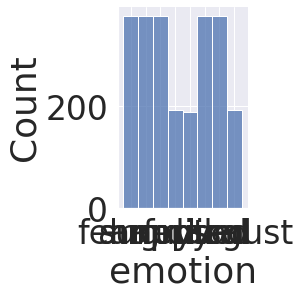

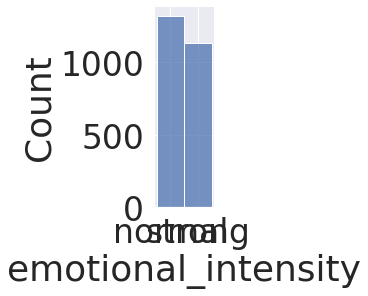

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


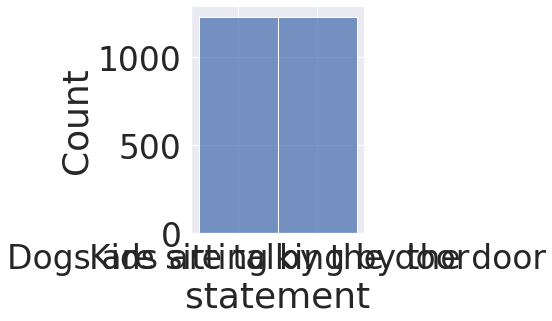

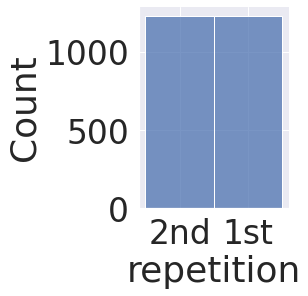

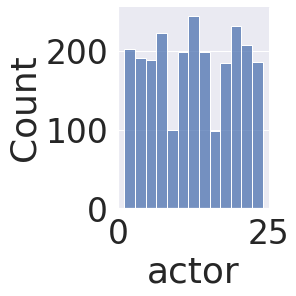

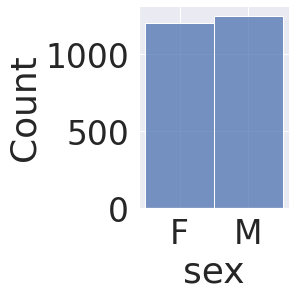

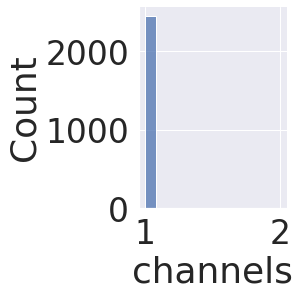

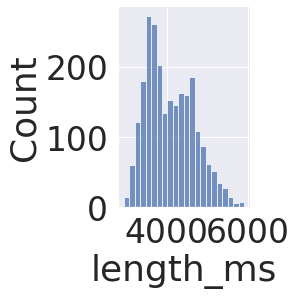

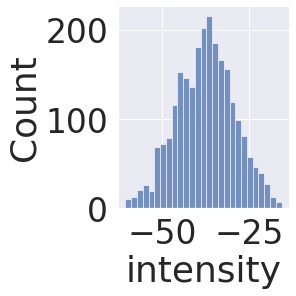

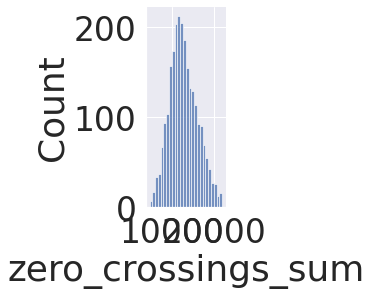

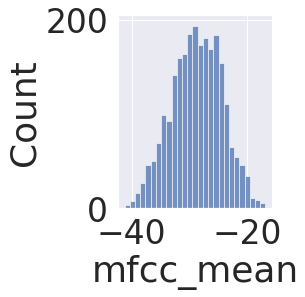

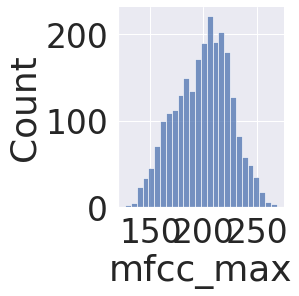

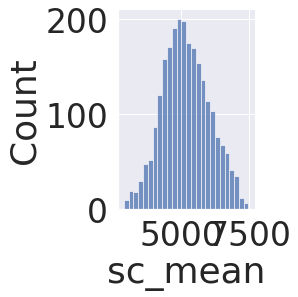

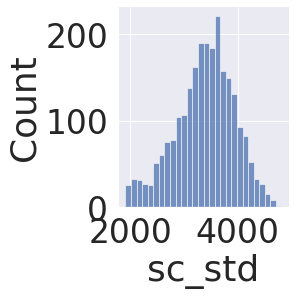

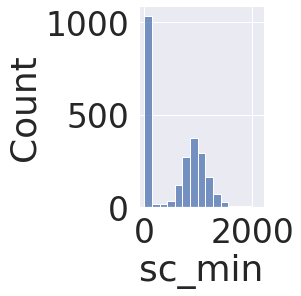

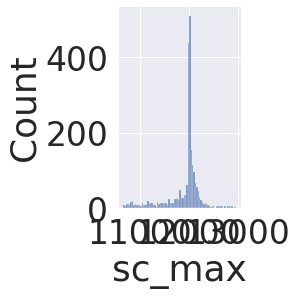

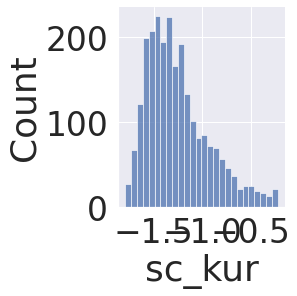

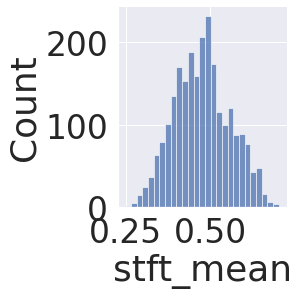

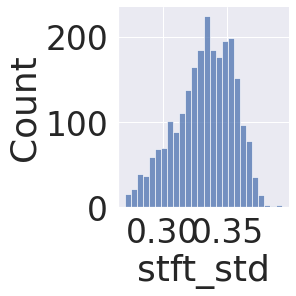

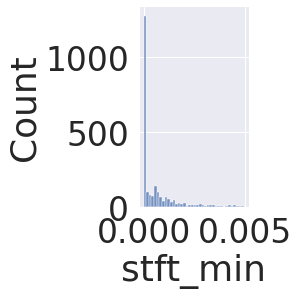

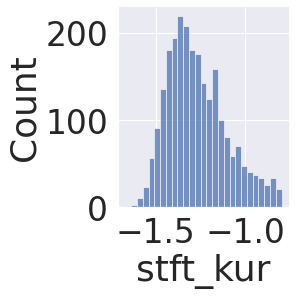

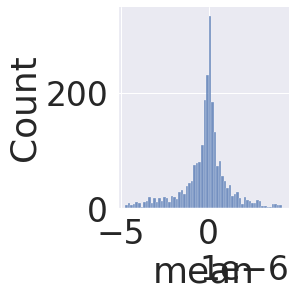

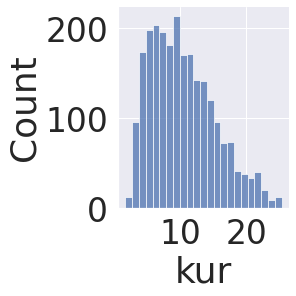

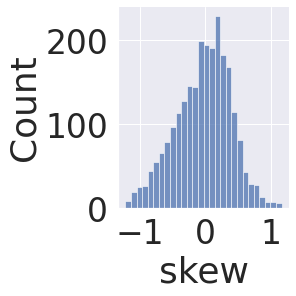

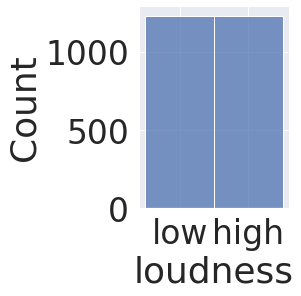

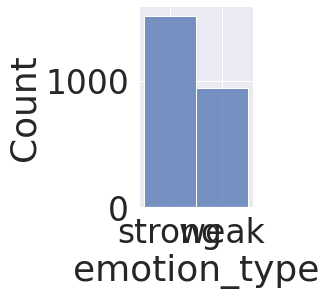

In [27]:
for x in df_prep.columns:
  sns.displot(df_prep, x=x)
  plt.show()

##Split dataset by emotion emphasis

In [28]:
# define two groups of emphasis level
# high emphasis
df_emph_high = df_prep[
    # strong emotions with high loudness
    ((df_prep["loudness"] == "high") & (df_prep["emotion_type"] == "strong")) | 
    # weak emotions with low loudness
    ((df_prep["loudness"] == "low") & (df_prep["emotion_type"] == "weak"))
]

# low emphasis
df_emph_low = df_prep[
    # strong emotions with low loudness
    ((df_prep["loudness"] == "low") & (df_prep["emotion_type"] == "strong")) | 
    # weak emotions with high loudness
    ((df_prep["loudness"] == "high") & (df_prep["emotion_type"] == "weak"))
]

df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 0 to 2451
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2452 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   actor                2452 non-null   float64
 6   sex                  2452 non-null   object 
 7   channels             2452 non-null   int64  
 8   length_ms            2452 non-null   float64
 9   intensity            2452 non-null   float64
 10  zero_crossings_sum   2452 non-null   float64
 11  mfcc_mean            2452 non-null   float64
 12  mfcc_max             2452 non-null   float64
 13  sc_mean              2452 non-null   float64
 14  sc_std               2452 non-null   float64
 15  sc_min               2452 non-null   f

###Exporting files

In [29]:
df_prep.to_excel("df_prep_final.xlsx",
             sheet_name='Prepared Data Set') 

In [30]:
df_emph_high.to_excel("df_prep_final_emph_high.xlsx",
             sheet_name='Prepared Data Set with low emphasis')

/usr/local/lib/python3.8/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [31]:
df_emph_low.to_excel("df_prep_final_emph_low.xlsx",
             sheet_name='Prepared Data Set with high emphasis') 